# Sample model using Keras with TF backend

Welcome to the course!

This is an introduction lession to help you understand few key starting points using Keras. We are using tensorflow(default) as our backend, but you can use 'theano' or 'CNTK'.

**NOTE:**
If you are running on the TensorFlow or CNTK backends, your code will automatically run on GPU if any available GPU is detected.

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

**One of the Method:** manually set theano.config.device, theano.config.floatX at the beginning of your code:


In [2]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

import keras
from keras.models import Sequential
from keras.layers import Activation, BatchNormalization
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

Using TensorFlow backend.


Good to be in the latest version of Keras. 

In [3]:
keras.__version__

'2.2.4'

In [4]:
train_labels = []
train_samples = []

## Generated Data

1. An experiemental drug was tested on individuals from age 13 to 100.
2. The trial had 2100 participants. Half were below 65 years, half were above 65 years old.
3. 95% of patients 65 or older experienced side effects.
4. 95% of patients under 65 expereinced no side effects.

In [5]:
for i in range(1000):
    single_list = []
    a = randint(0, 1)
    b = randint(0, 1)
    single_list.append(a)
    single_list.append(b)
    train_samples.append(single_list)
    if a + b == 1: train_labels.append(1)
    else: train_labels.append(0)
    
    

   

In [6]:
# Display raw data
for i in range(500):
    print train_samples[i]
    print train_labels[i] 

[0, 1]
1
[0, 1]
1
[0, 1]
1
[1, 1]
0
[1, 1]
0
[1, 0]
1
[1, 0]
1
[0, 0]
0
[1, 0]
1
[1, 1]
0
[0, 1]
1
[0, 1]
1
[0, 1]
1
[1, 0]
1
[0, 1]
1
[1, 0]
1
[0, 1]
1
[0, 1]
1
[1, 1]
0
[0, 1]
1
[0, 0]
0
[0, 1]
1
[1, 0]
1
[0, 1]
1
[0, 0]
0
[1, 1]
0
[0, 0]
0
[1, 1]
0
[0, 1]
1
[0, 0]
0
[0, 0]
0
[1, 0]
1
[1, 0]
1
[1, 0]
1
[1, 0]
1
[0, 1]
1
[1, 1]
0
[1, 1]
0
[0, 0]
0
[0, 1]
1
[1, 0]
1
[1, 0]
1
[1, 1]
0
[0, 0]
0
[1, 1]
0
[0, 0]
0
[0, 0]
0
[1, 0]
1
[1, 0]
1
[0, 1]
1
[0, 0]
0
[0, 1]
1
[0, 1]
1
[1, 0]
1
[1, 0]
1
[0, 1]
1
[0, 0]
0
[0, 0]
0
[0, 0]
0
[1, 0]
1
[0, 0]
0
[0, 0]
0
[1, 1]
0
[1, 0]
1
[0, 0]
0
[1, 0]
1
[1, 1]
0
[1, 0]
1
[1, 0]
1
[1, 0]
1
[1, 0]
1
[0, 1]
1
[0, 0]
0
[0, 1]
1
[1, 0]
1
[0, 0]
0
[0, 0]
0
[1, 1]
0
[0, 0]
0
[1, 1]
0
[0, 0]
0
[0, 1]
1
[1, 1]
0
[0, 0]
0
[1, 0]
1
[0, 0]
0
[1, 1]
0
[1, 0]
1
[0, 1]
1
[0, 0]
0
[0, 1]
1
[0, 0]
0
[0, 0]
0
[0, 0]
0
[1, 1]
0
[0, 0]
0
[0, 0]
0
[0, 0]
0
[1, 0]
1
[1, 0]
1
[0, 0]
0
[0, 0]
0
[0, 1]
1
[1, 1]
0
[1, 0]
1
[0, 0]
0
[1, 0]
1
[1, 0]
1
[1, 0]
1
[1, 1]
0
[0, 0]
0
[

## Data tranformation

We cannot fed the raw data to the network, it needs to be transfored to make it normalized and standardized. 

In [7]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

To visualize the model/graph, model.summary() can give you the summary of the architecture output.  

In [8]:
model = Sequential([
    Dense(16, input_shape=(2,), activation='relu'),
    Dense(32, activation='relu'),
    BatchNormalization(axis=1),
    Dense(2, activation='softmax')
])


W0813 08:13:29.618808 139644836800256 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0813 08:13:29.881876 139644836800256 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0813 08:13:29.909465 139644836800256 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0813 08:13:30.110196 139644836800256 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.



In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                48        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 786
Trainable params: 722
Non-trainable params: 64
_________________________________________________________________


## Configures the model for training.

Now, that our model/grpah is ready, we can run optimizer and we are going to use Adam.

**Optimizers:** Most of the well know optimzers can be found [here](http://ruder.io/optimizing-gradient-descent/).

**Loss Function:** Find most of the loss function [here](https://isaacchanghau.github.io/2017/06/07/Loss-Functions-in-Artificial-Neural-Networks/). 

In [10]:
model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

W0813 08:13:35.222824 139644836800256 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0813 08:13:35.228250 139644836800256 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.



## Validation set

Validation set can be given either as a seperate set or let Keras split the validation set from testing set. 

In [11]:
#valid_set = [(sample, label), (sample, label), (sample, label)]
#model.fit(scaled_train_samples, train_labels, validation_data=valid_set, batch_size=10, epochs=20, shuffle=True, verbose=2)

## To start the training,
We have to call fit(), Validation_split will split the training data and put x% of the images into validation set.

Let us play a bit! 

**validation_split**: splits the training data randomly into two parts, trianing and validation based on the percentage specified. DISCLAIMER: this is not recommended practise, avoid doing this on the production network, another important tip, avoid augementing validation data. 

Play time!!!
change validation precentage and see the difference. This will give you intution about how data is fit/overfit/underfit.

In [12]:
model.fit(train_samples, train_labels, validation_split=0.4, batch_size=3, epochs=10, shuffle=True, verbose=2)

W0813 08:13:41.464354 139644836800256 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/math_grad.py:1250: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 600 samples, validate on 400 samples
Epoch 1/10
 - 2s - loss: 0.2691 - acc: 0.8917 - val_loss: 0.0118 - val_acc: 1.0000
Epoch 2/10
 - 0s - loss: 0.1929 - acc: 0.8700 - val_loss: 0.0031 - val_acc: 1.0000
Epoch 3/10
 - 0s - loss: 0.1499 - acc: 0.8967 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 4/10
 - 0s - loss: 0.1832 - acc: 0.8950 - val_loss: 8.7062e-04 - val_acc: 1.0000
Epoch 5/10
 - 0s - loss: 0.1916 - acc: 0.8850 - val_loss: 3.9206e-04 - val_acc: 1.0000
Epoch 6/10
 - 0s - loss: 0.1839 - acc: 0.8617 - val_loss: 5.3213e-04 - val_acc: 1.0000
Epoch 7/10
 - 0s - loss: 0.2376 - acc: 0.8600 - val_loss: 3.3817e-04 - val_acc: 1.0000
Epoch 8/10
 - 0s - loss: 0.1532 - acc: 0.8800 - val_loss: 2.9538e-04 - val_acc: 1.0000
Epoch 9/10
 - 0s - loss: 0.1935 - acc: 0.8550 - val_loss: 1.6411e-04 - val_acc: 1.0000
Epoch 10/10
 - 0s - loss: 0.1928 - acc: 0.8550 - val_loss: 2.1933e-04 - val_acc: 1.0000


**Play with few hyper parameters:**
    1. Batch size
    2. Learning Rate (model.optimizer.lr = 0.001)
    3. epochs
    4. May be also with Optimizers and loss function. 

## Save Model



In [13]:
model.save('sample_model.h5')

This save() function save following:

    1. The architecture of the model, allowing to create the model.
    2. The weights of the model.
    3. The training configuration of the model (loss, optimizer).
    4. The state of the optimizer, allowing training to resume from where you left before.

## Load Model

In [14]:
from keras.models import load_model
new_model = load_model('sample_model.h5')

In [15]:
new_model.summary()
new_model.get_weights()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                48        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 786
Trainable params: 722
Non-trainable params: 64
_________________________________________________________________


[array([[ 0.23024581, -0.19747609,  0.3311491 ,  0.47027552,  0.26918444,
         -0.5562627 ,  0.45498133,  0.20552693, -0.03951234, -0.22698158,
          0.36985812,  0.08780595, -0.5773784 ,  0.16780013,  0.31996435,
          0.45107135],
        [ 0.51826805, -0.24160728, -0.38616866, -0.4836536 ,  0.44084105,
         -0.39868623, -0.08678935,  0.27585354,  0.5312809 , -0.49114865,
          0.5184543 ,  0.17717402,  0.56583714, -0.09748786,  0.48643517,
         -0.4718401 ]], dtype=float32),
 array([-0.00441821,  0.        ,  0.00764048, -0.00321738, -0.03742487,
         0.        ,  0.04662776,  0.04820221, -0.00710691,  0.        ,
         0.05769783,  0.06134494, -0.00339332,  0.00806597, -0.06309385,
        -0.00893059], dtype=float32),
 array([[-1.27386540e-01,  2.99224854e-01, -1.18940614e-01,
         -2.16400370e-01, -4.67129610e-02, -2.06954375e-01,
         -3.90084535e-02,  2.05267221e-01, -1.34334877e-01,
          5.20245209e-02, -2.47033343e-01, -4.42151949e-

## Predict

Create a test set and use that to test the model.

In [16]:
test_samples = []
test_labels = []
for i in range(100):
    single_list = []
    a = randint(0, 1)
    b = randint(0, 1)
    single_list.append(a)
    single_list.append(b)
    test_samples.append(single_list)
    if a + b == 1: test_labels.append(1)
    else: test_labels.append(0)

test_samples = np.array(test_samples)
test_labels = np.array(test_labels)

for i in range(100):
    print test_samples[i]
    print test_labels[i] 
# test_scaler = MinMaxScaler(feature_range=(0,1))
# scaled_test_samples = test_scaler.fit_transform((test_samples).reshape(-1, 1))

predictions = model.predict(test_samples, verbose=1, steps=1)

[1 0]
1
[1 0]
1
[0 1]
1
[0 1]
1
[1 0]
1
[1 1]
0
[0 0]
0
[1 0]
1
[0 1]
1
[1 1]
0
[0 0]
0
[0 1]
1
[1 0]
1
[1 1]
0
[0 1]
1
[0 0]
0
[0 0]
0
[1 1]
0
[1 0]
1
[0 1]
1
[0 1]
1
[1 1]
0
[0 0]
0
[1 1]
0
[0 0]
0
[1 0]
1
[1 0]
1
[1 1]
0
[0 1]
1
[1 1]
0
[0 1]
1
[1 1]
0
[1 0]
1
[0 0]
0
[0 1]
1
[1 0]
1
[1 1]
0
[0 1]
1
[1 1]
0
[1 0]
1
[1 0]
1
[0 1]
1
[0 0]
0
[1 0]
1
[0 0]
0
[0 0]
0
[1 1]
0
[1 1]
0
[1 1]
0
[1 0]
1
[1 0]
1
[1 0]
1
[0 1]
1
[1 0]
1
[1 1]
0
[0 1]
1
[1 1]
0
[1 0]
1
[1 1]
0
[1 0]
1
[0 1]
1
[0 1]
1
[0 0]
0
[0 1]
1
[0 1]
1
[0 1]
1
[1 1]
0
[0 0]
0
[1 1]
0
[0 0]
0
[1 0]
1
[1 0]
1
[1 0]
1
[1 0]
1
[0 1]
1
[1 0]
1
[1 1]
0
[0 1]
1
[1 0]
1
[0 0]
0
[0 0]
0
[0 1]
1
[0 1]
1
[0 1]
1
[0 0]
0
[0 1]
1
[1 0]
1
[1 1]
0
[0 1]
1
[0 0]
0
[1 0]
1
[1 1]
0
[1 1]
0
[1 1]
0
[1 0]
1
[1 1]
0
[0 1]
1
[1 0]
1
[1 1]
0
[0 1]
1
1/1 [==============================] - 0s 50ms/step


In [17]:
predictions

array([[4.6855370e-05, 9.9995315e-01],
       [4.6855370e-05, 9.9995315e-01],
       [1.7170099e-04, 9.9982822e-01],
       [1.7170099e-04, 9.9982822e-01],
       [4.6855370e-05, 9.9995315e-01],
       [9.9988616e-01, 1.1386086e-04],
       [9.9942338e-01, 5.7666207e-04],
       [4.6855370e-05, 9.9995315e-01],
       [1.7170099e-04, 9.9982822e-01],
       [9.9988616e-01, 1.1386086e-04],
       [9.9942338e-01, 5.7666207e-04],
       [1.7170099e-04, 9.9982822e-01],
       [4.6855370e-05, 9.9995315e-01],
       [9.9988616e-01, 1.1386086e-04],
       [1.7170099e-04, 9.9982822e-01],
       [9.9942338e-01, 5.7666207e-04],
       [9.9942338e-01, 5.7666207e-04],
       [9.9988616e-01, 1.1386086e-04],
       [4.6855370e-05, 9.9995315e-01],
       [1.7170099e-04, 9.9982822e-01],
       [1.7170099e-04, 9.9982822e-01],
       [9.9988616e-01, 1.1386086e-04],
       [9.9942338e-01, 5.7666207e-04],
       [9.9988616e-01, 1.1386086e-04],
       [9.9942338e-01, 5.7666207e-04],
       [4.6855370e-05, 9.

## Confusion Matrix

In [18]:
cm_plot_labels = ['no-effect', 'effect']
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 0 43]
 [57  0]]


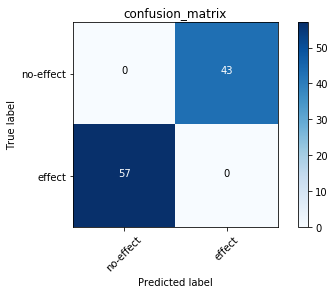

In [20]:
plot_confusion_matrix(cm, cm_plot_labels, title='confusion_matrix')